In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [202]:
dataset=pd.read_csv('nyc_taxi_trip_duration.csv')
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [203]:
dataset['trip_duration']=dataset['trip_duration']/60

In [204]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 61.2+ MB


In [205]:
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,15.870486
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,64.410437
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,0.016667
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,6.616667
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,11.050000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,17.916667
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,32328.933333


In [206]:
dataset.drop('vendor_id',inplace=True,axis=1)

In [207]:
from math import sin, cos, sqrt, atan2

R = 6373.0

lat1 = dataset['pickup_latitude'].values
lon1 = dataset['pickup_longitude'].values
lat2 = dataset['dropoff_latitude'].values
lon2 = dataset['dropoff_longitude'].values

dlon = lon2 - lon1
dlat = lat2 - lat1
distance=[]
for i in range(len(dataset)):
    a = (sin(dlat[i]/2))**2 + cos(lat1[i]) * cos(lat2[i]) * (sin(dlon[i]/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance.append(R * c)
dataset['Distance']=distance   
dataset.drop(['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'],
            axis=1,inplace=True)

In [208]:
numerical_cols=dataset.select_dtypes(['int','float']).columns
numerical_cols

Index(['passenger_count', 'trip_duration', 'Distance'], dtype='object')

In [209]:
for i in numerical_cols:
    print(i+" Max value is "+str(dataset[i].max()))

passenger_count Max value is 9
trip_duration Max value is 32328.933333333334
Distance Max value is 15215.167834296637


In [210]:
for i in numerical_cols:
    print(i+" Min value is "+str(dataset[i].min()))

passenger_count Min value is 0
trip_duration Min value is 0.016666666666666666
Distance Min value is 0.0


In [211]:
for i in numerical_cols:
    print('Range of {}{}{}{}'.format(i,':',dataset[i].max(),dataset[i].min()))

Range of passenger_count:90
Range of trip_duration:32328.9333333333340.016666666666666666
Range of Distance:15215.1678342966370.0


In [212]:
for i in numerical_cols:
    print('Mean of {}{}{}'.format(i,': ',dataset[i].mean()))

Mean of passenger_count: 1.6620546205928246
Mean of trip_duration: 15.870485555991268
Mean of Distance: 225.19728657196717


In [213]:
for i in numerical_cols:
    print('Median of {}{}{}'.format(i,': ',dataset[i].median()))

Median of passenger_count: 1.0
Median of trip_duration: 11.05
Median of Distance: 135.07442252383083


In [214]:
for i in numerical_cols:
    print('Standard Deviation of {}{}{}'.format(i,': ',dataset[i].std()))

Standard Deviation of passenger_count: 1.3124456158621738
Standard Deviation of trip_duration: 64.41043662135321
Standard Deviation of Distance: 272.23850929075604


In [215]:
for i in numerical_cols:
    print('Variance of {}{}{}'.format(i,': ',dataset[i].var()))

Variance of passenger_count: 1.722513494595841
Variance of trip_duration: 4148.70434575336
Variance of Distance: 74113.80594085307


In [216]:
dataset['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

In [217]:
dataset['trip_duration'].describe()

count    729322.000000
mean         15.870486
std          64.410437
min           0.016667
25%           6.616667
50%          11.050000
75%          17.916667
max       32328.933333
Name: trip_duration, dtype: float64

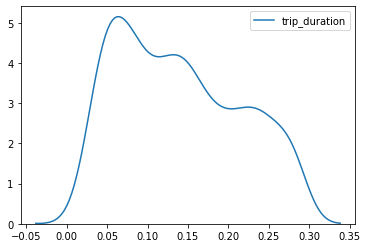

In [218]:
sns.kdeplot(dataset[dataset['trip_duration']<=0.298611]['trip_duration'])

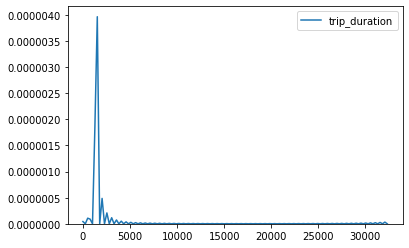

In [219]:
sns.kdeplot(dataset['trip_duration'])

In [220]:
dataset['Distance'].describe()

count    729322.000000
mean        225.197287
std         272.238509
min           0.000000
25%          80.124531
50%         135.074423
75%         244.453664
max       15215.167834
Name: Distance, dtype: float64

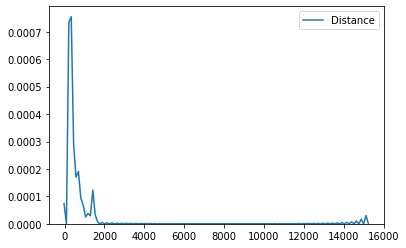

In [221]:
sns.kdeplot(dataset['Distance'])

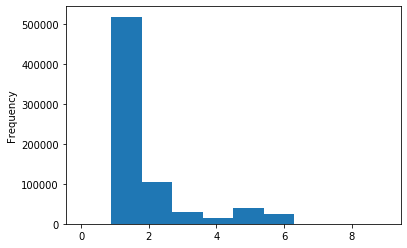

In [222]:
dataset['passenger_count'].plot(kind='hist')

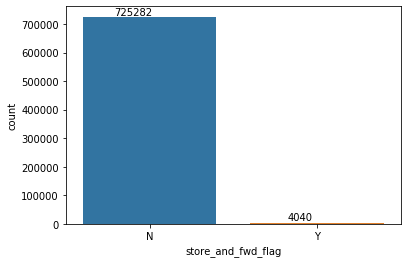

In [223]:
ax=sns.countplot(dataset['store_and_fwd_flag'])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.3,p.get_height()),
               ha='center',va='bottom',color='black')
plt.show()    

In [224]:
dataset.head()

,id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,Distance
0,id1080784,2016-02-29 16:40:21,2016-02-29 16:47:01,1,N,6.666667,80.142332
1,id0889885,2016-03-11 23:35:37,2016-03-11 23:53:57,2,N,18.333333,238.106427
2,id0857912,2016-02-21 17:59:33,2016-02-21 18:26:48,2,N,27.250000,462.455755
3,id3744273,2016-01-05 09:44:31,2016-01-05 10:03:32,6,N,19.016667,136.827598
4,id0232939,2016-02-17 06:42:23,2016-02-17 06:56:31,1,N,14.133333,274.888260


In [225]:
date_time=[pd.Timestamp(i) for i in dataset['pickup_datetime'].values]
dataset['pickup_datetime']=date_time
weekday=[i.weekday() for i in date_time]
dataset['Weekday']=weekday

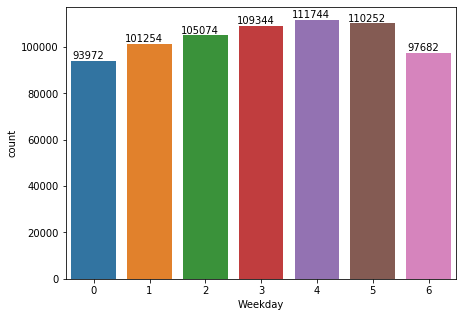

In [226]:
plt.figure(figsize=(7,5))
ax=sns.countplot(dataset['Weekday'])
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x()+0.3,p.get_height()),
               ha='center',va='bottom',color='black')
plt.show()   

In [227]:
def outliers(data,cols):
    for i in range(len(cols)):
        Q1=data[cols[i]].quantile(0.25)
        Q3=data[cols[i]].quantile(0.75)
        IQR=Q3-Q1
        Q2=data[cols[i]].median()
        whis_low=Q2-1.5*IQR
        whis_high=Q2+1.5*IQR
        outlier_high=len(data[data[cols[i]]>whis_high][cols[i]])
        outlier_low=len(data[data[cols[i]]<whis_low][cols[i]])
        print("For "+cols[i])
        print("Upper Outlier: "+str(outlier_high)+" Lower Outlier: "+str(outlier_low))
        data[data[cols[i]]>whis_high][cols[i]]=whis_high+1
        data[data[cols[i]]<whis_low][cols[i]]=whis_low-1
        print("After Removing Outliers:")
        plt.subplot(1,len(cols),i+1)
        sns.boxplot(data[cols[i]],orient='v')
        plt.ylabel('{}'.format(cols[i]))
        plt.tight_layout()

For passenger_count
Upper Outlier: 106777 Lower Outlier: 0
After Removing Outliers:
For trip_duration
Upper Outlier: 67779 Lower Outlier: 0
After Removing Outliers:
For Distance
Upper Outlier: 100528 Lower Outlier: 0
After Removing Outliers:


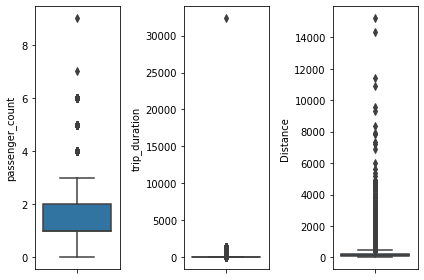

In [228]:
outliers(dataset,numerical_cols)

In [229]:
dataset[numerical_cols].corr()

,passenger_count,trip_duration,Distance
passenger_count,1.000000,0.013022,0.010211
trip_duration,0.013022,1.000000,0.136682
Distance,0.010211,0.136682,1.000000


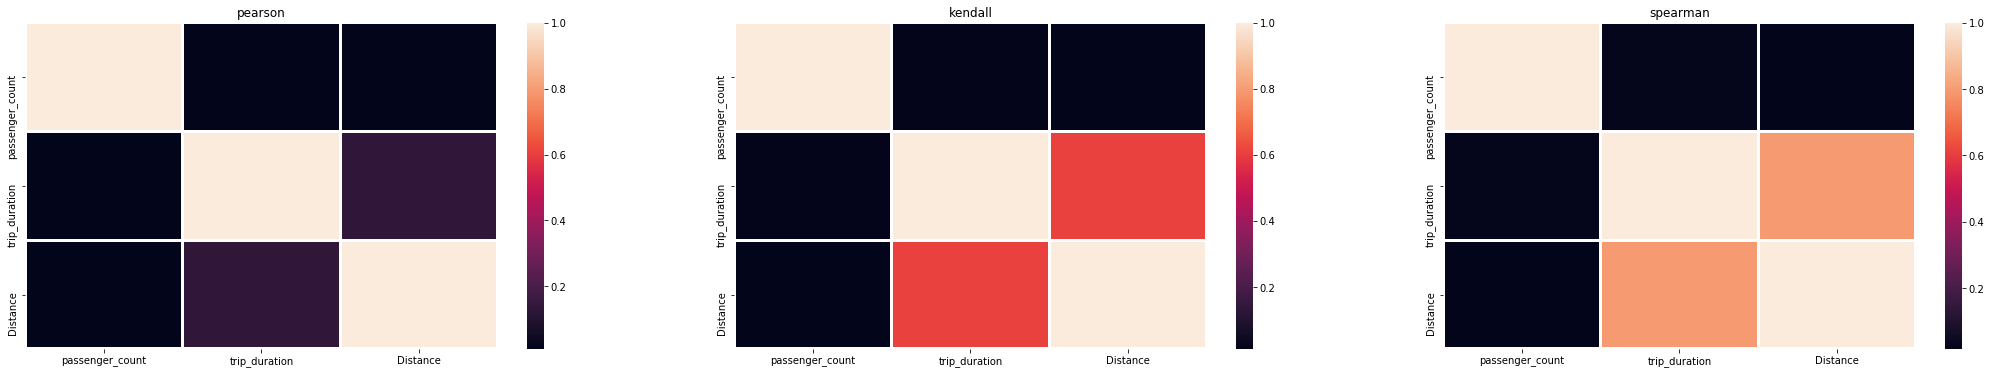

In [230]:
plt.figure(figsize=(36,6))
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation=dataset[numerical_cols].corr(method=i)
    sns.heatmap(correlation,linewidth=2)
    plt.title(i,fontsize=12)

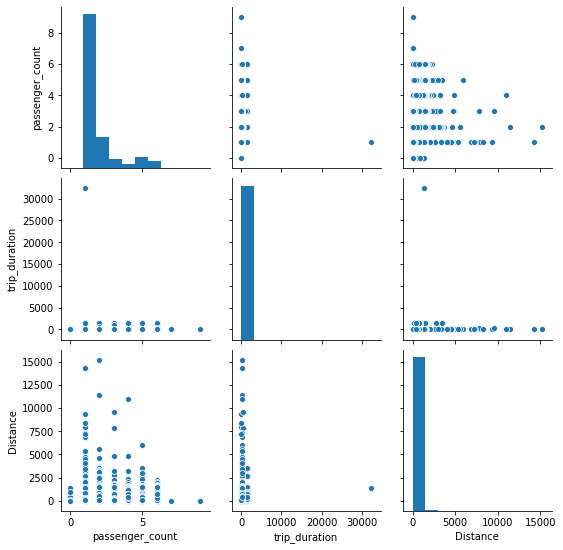

In [231]:
sns.pairplot(dataset[numerical_cols])

In [232]:
weekend_dataset=dataset[(dataset['Weekday']==5)|(dataset['Weekday']==6)]
weekday_dataset=dataset[(dataset['Weekday']!=5) & (dataset['Weekday']!=6)]

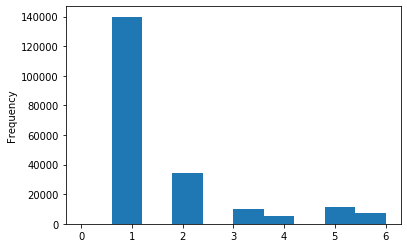

In [233]:
weekend_dataset['passenger_count'].plot(kind='hist')

In [234]:
weekend_dataset['passenger_count'].value_counts()

1    139904
2     34473
5     11485
3      9995
6      7058
4      5004
0        15
Name: passenger_count, dtype: int64

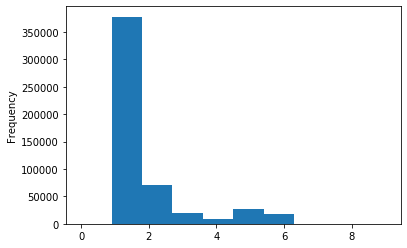

In [235]:
weekday_dataset['passenger_count'].plot(kind='hist')

In [236]:
weekday_dataset['passenger_count'].value_counts()

1    377511
2     70624
5     27441
3     19697
6     17049
4      9046
0        18
9         1
7         1
Name: passenger_count, dtype: int64